### Please install the required Python modules/SDKs

In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

## Importing Azure Form Recognizer Python modules

In [2]:
import os
import io
import glob
import time
import sys
import uuid
import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
from io import BytesIO

from azure.core.exceptions import ResourceNotFoundError
from azure.ai.formrecognizer import FormRecognizerClient, FormTrainingClient
from azure.core.credentials import AzureKeyCredential
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from azure.storage.blob import BlobServiceClient
from msrest.authentication import CognitiveServicesCredentials, ApiKeyCredentials

from video_indexer import VideoIndexer
from urllib.parse import urlparse
from matplotlib.pyplot import imshow


## Step 3

## Upload Video

In [3]:
video_analysis = VideoIndexer(
    vi_subscription_key='',
    vi_location="trial",
    vi_account_id=""
)

In [4]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiI5NGQyMWY0ZDZlY2Y0MzRmOGUzYmRhMDVjMWU3MmRhZCIsIkFjY291bnRJZCI6ImJlYmJiOGFmLTIyMTQtNGU0Yy1iNjczLTRiN2Q2MDVjYmMyYiIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjRBMjhFM0NFQUU4ODQyMDk5RDQyRTZGRThCREIxRjA4IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY5ODYzMzI2MSwiZXhwIjoxNjk4NjM3MTYxLCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.sMvAc_llz761ge5fSSzZTvY8ifV9SHnTb8IEOFH9G0j-Gano4LP-6NP3nZ3t5Bw_RVSzatHXgEKAjVCphq_87X29CMdX-90ziwoNudchIVFF5KNOetg407-MNYbnDPtnoMRL8VK1nNffyKtN4Tl5j_HBvdjOsD_2C-YhcxD4IU65IRsa5-sdAr5HT6zGeZSjTt0JZmG8lq1ATJiAHQXTDG6J7V6lvv0Cww07ND_VASlEZHZs_1HM2Tmy-_a8YJ0-aNpmy2VqeTqZYr_8gPKm7_7gnp1dFps-2KFmBAd6aFFaWAUf-Mj-2FjOZYxg7aCavAi8zjDJFlGP9WShFxMlOA


In [5]:
video_id = '74e2ce28ab'

In [6]:
video_analysis.get_video_info(video_id)

Getting video info for: 74e2ce28ab


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': 'bebbb8af-2214-4e4c-b673-4b7d605cbc2b',
 'id': '74e2ce28ab',
 'name': 'ca-dl-avkash-chauhan',
 'userName': 'Richard Helton',
 'created': '2023-10-29T08:15:02.58+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'duration': '0:00:26.499856',
 'summarizedInsights': {'name': 'ca-dl-avkash-chauhan',
  'id': '74e2ce28ab',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': '74e2ce28ab',
  'thumbnailId': '0db877fa-54fa-452b-bc3f-1072548ff26e',
  'faces': [{'videoId': '74e2ce28ab',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': 'e2f1baa2-3a5d-4cb1-8ec8-a5ac8930deae',
    'seenDuration': 26.5,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.4998556',
      'startSec

In [7]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 74e2ce28ab


In [8]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [9]:
info['summarizedInsights']['sentiments']

[{'sentimentKey': 'Neutral',
  'seenDurationRatio': 0.8226,
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:00:07.48',
    'startSeconds': 0,
    'endSeconds': 7.5},
   {'startTime': '0:00:12.16',
    'endTime': '0:00:26.499856',
    'startSeconds': 12.2,
    'endSeconds': 26.5}]},
 {'sentimentKey': 'Negative',
  'seenDurationRatio': 0.1774,
  'appearances': [{'startTime': '0:00:07.48',
    'endTime': '0:00:12.16',
    'startSeconds': 7.5,
    'endSeconds': 12.2}]}]

In [10]:
info['summarizedInsights']['emotions']

[{'type': 'Anger',
  'seenDurationRatio': 0.1774,
  'appearances': [{'startTime': '0:00:07.48',
    'endTime': '0:00:12.16',
    'startSeconds': 7.5,
    'endSeconds': 12.2}]}]

In [11]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 74e2ce28ab, thumbnail: 4dcac8c4-73b7-45ba-a637-5dfbe769b11d
Getting thumbnail from video: 74e2ce28ab, thumbnail: 3a01d9bf-77d4-46b9-b5ad-a31228bd0cf4
Getting thumbnail from video: 74e2ce28ab, thumbnail: 1166d4ff-1aa2-428e-921f-b1788c728894
Getting thumbnail from video: 74e2ce28ab, thumbnail: b84ce045-a98b-4a38-baa4-8df915caa3d8
Getting thumbnail from video: 74e2ce28ab, thumbnail: 3a483e3c-7a56-45ee-a861-9f239510c542
Getting thumbnail from video: 74e2ce28ab, thumbnail: e2f1baa2-3a5d-4cb1-8ec8-a5ac8930deae


{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}


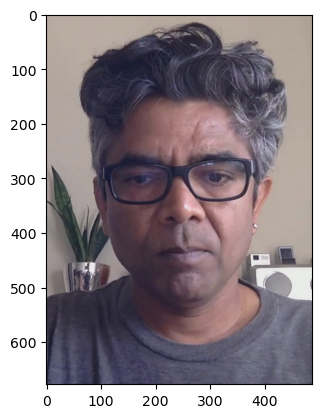

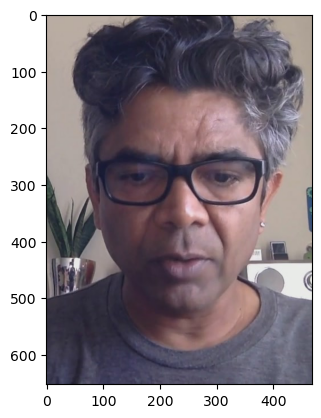

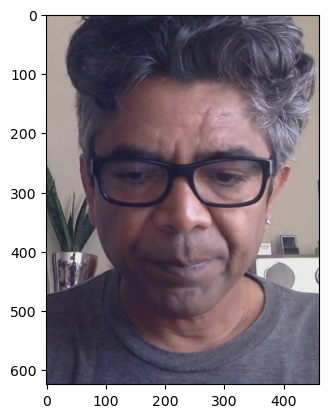

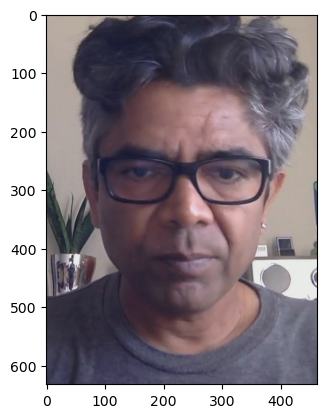

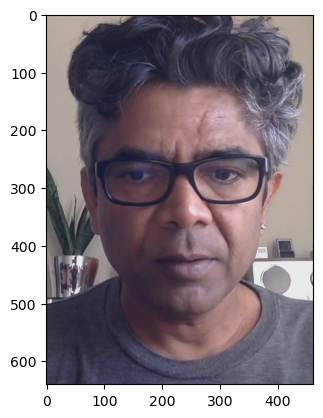

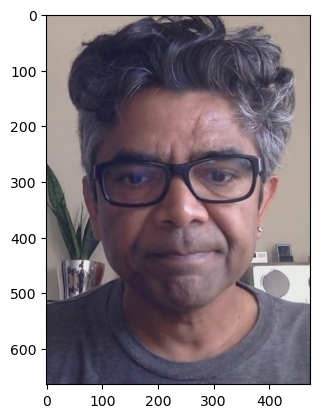

In [12]:
for img in images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

In [13]:
i = 1
for img in images:
    print(type(img))
    img.save('kiosk-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [14]:
# Create a client
KEY = ""
ENDPOINT = ""
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))


In [15]:


def test_azure_face_api():
    try:
        # Using a sample image URL. You can replace with any valid image URL.
        image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
        detected_faces = face_client.face.detect_with_url(image_url)
        
        if detected_faces:
            print(f"Detected {len(detected_faces)} face(s) in the sample image.")
            return True
        else:
            print("No faces detected in the sample image, but the API key and endpoint are valid.")
            return True
    except Exception as e:
        print(f"Error: {e}")
        return False

# Test the Face API
test_azure_face_api()


Detected 1 face(s) in the sample image.


True

In [16]:
face_client.api_version

'1.0'

In [17]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-avkash-kiosk'

In [18]:
## This code is taken from Azure face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    my_face = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg images of human in working directory.
    my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("kiosk-face")]
    # Add images to a Person object
    for image_p in my_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, my_face.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [19]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: e48cf1d7-347a-417a-a338-ed491c0d44ed
Training status: TrainingStatusType.running.
Training status: TrainingStatusType.succeeded.


In [20]:
dl_faces = face_client.face.detect_with_url("https://raw.githubusercontent.com/natebuel29/cd0461-building-computer-vision-solutions-with-azure-project-starter/master/starter/digital_id_template/ca-dl-avkash.png")
dl_faces[0].face_id

'653b78f6-a9bb-4e33-ab36-0f8d3472f16e'

In [21]:
# Enter the face ID of ca-dl-sample.png from the output of the cell above
get_the_face_id_from_the_sample = '20320a97-2402-4c82-9a09-3510491fcf2f'

In [22]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_sample], PERSON_GROUP_ID)

In [23]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.8137


Uploading video to video indexer...
Getting video info for: 150aa39b7f
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: 150aa39b7f
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: 150aa39b7f
Video still processing, current status: 18%
Progress: [##################----------------------------------------------------------------------------------] 18% Getting video info for: 150aa39b7f
Video still processing, current status: 18%
Progress: [##################----------------------------------------------------------------------------------] 18% Getting video info for: 150aa39b7f
Video still processing, current status: 18%
Progress: [##################----------------------------------------------------------------------------

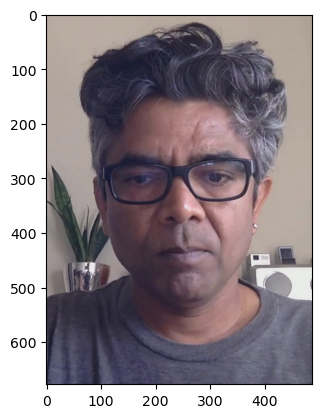

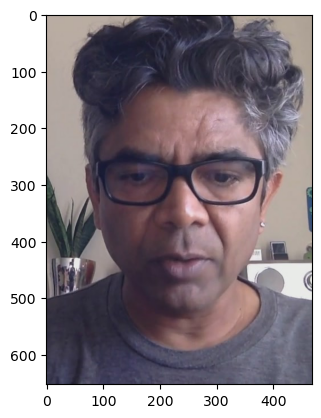

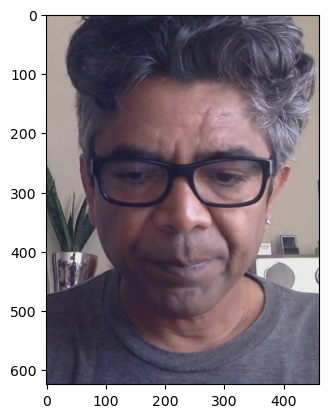

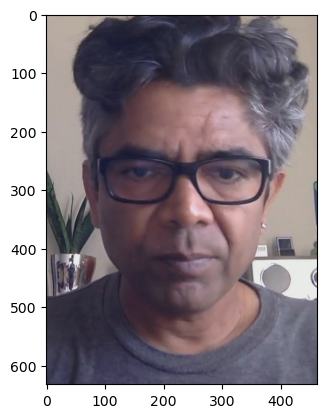

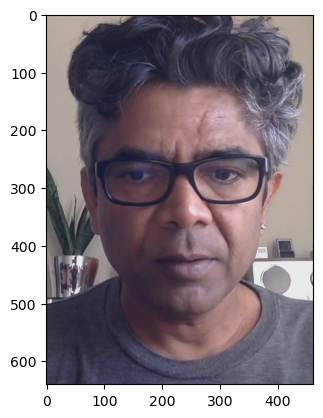

Uploading video to video indexer...
Getting video info for: ad094bf314
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: ad094bf314
Video still processing, current status: 15%
Progress: [###############-------------------------------------------------------------------------------------] 15% Getting video info for: ad094bf314
Video still processing, current status: 15%
Progress: [###############-------------------------------------------------------------------------------------] 15% Getting video info for: ad094bf314
Video still processing, current status: 15%
Progress: [###############-------------------------------------------------------------------------------------] 15% Getting video info for: ad094bf314
Video still processing, current status: 15%
Progress: [###############-----------------------------------------------------------------------------

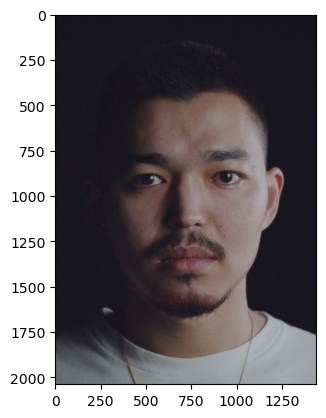

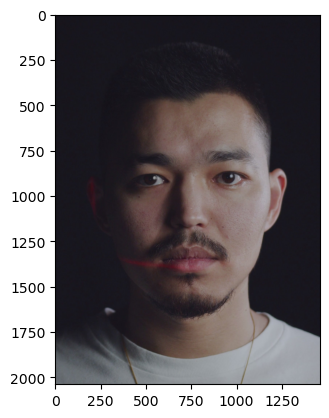

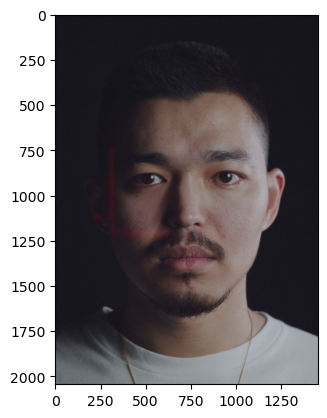

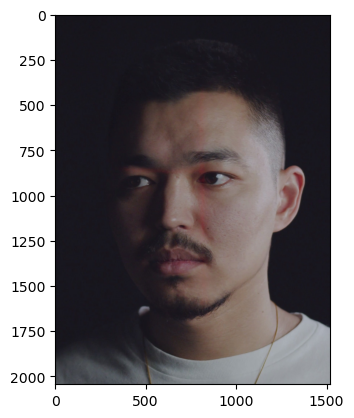

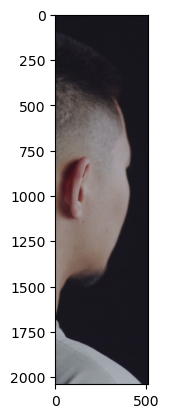

Uploading video to video indexer...
Getting video info for: b7c80399a3
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: b7c80399a3
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: b7c80399a3
Video still processing, current status: 40%
Progress: [########################################------------------------------------------------------------] 40% Getting video info for: b7c80399a3
Video still processing, current status: 70%
Progress: [######################################################################------------------------------] 70% Getting video info for: b7c80399a3
Video still processing, current status: 70%
Progress: [######################################################################------------------------

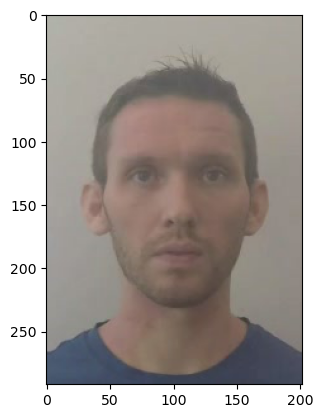

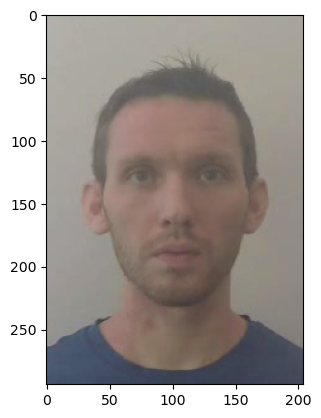

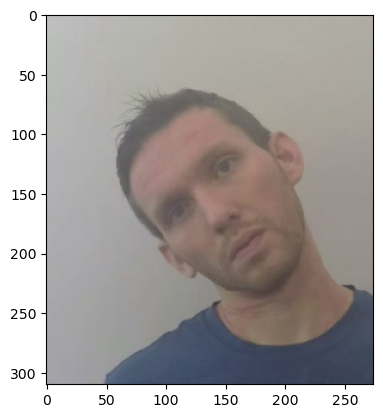

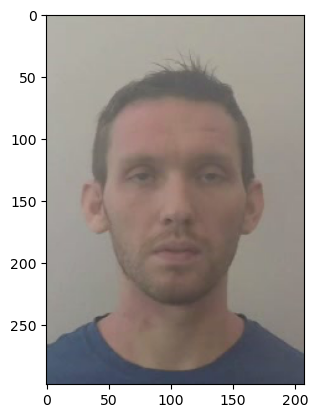

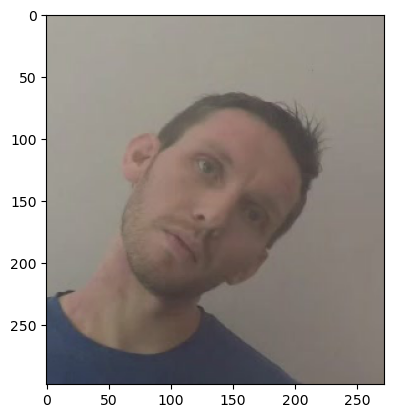

Uploading video to video indexer...
Getting video info for: bf1c9fe3e0
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: bf1c9fe3e0
Video still processing, current status: 13%
Progress: [#############---------------------------------------------------------------------------------------] 13% Getting video info for: bf1c9fe3e0
Video still processing, current status: 13%
Progress: [#############---------------------------------------------------------------------------------------] 13% Getting video info for: bf1c9fe3e0
Video still processing, current status: 13%
Progress: [#############---------------------------------------------------------------------------------------] 13% Getting video info for: bf1c9fe3e0
Video still processing, current status: 40%
Progress: [########################################----------------------------------------------------

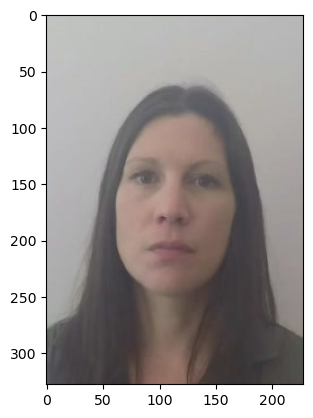

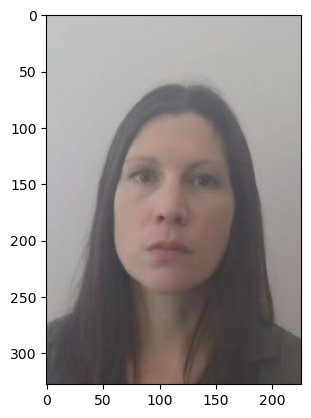

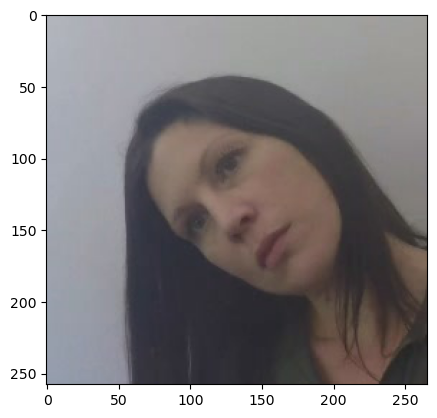

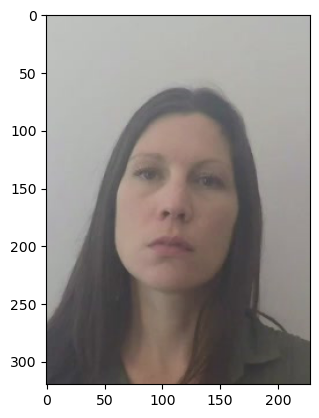

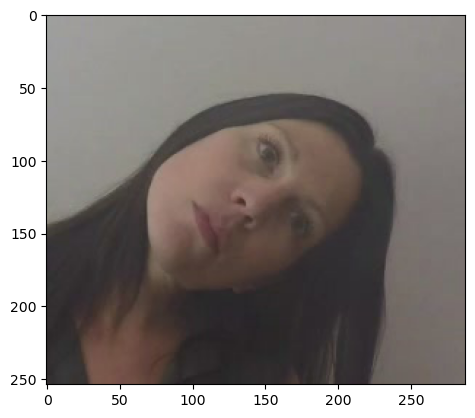

Uploading video to video indexer...
Getting video info for: ebd7808288
Video still processing, current status: 5%
Progress: [#####-----------------------------------------------------------------------------------------------] 5% Getting video info for: ebd7808288
Video still processing, current status: 13%
Progress: [#############---------------------------------------------------------------------------------------] 13% Getting video info for: ebd7808288
Video still processing, current status: 15%
Progress: [###############-------------------------------------------------------------------------------------] 15% Getting video info for: ebd7808288
Video still processing, current status: 15%
Progress: [###############-------------------------------------------------------------------------------------] 15% Getting video info for: ebd7808288
Video still processing, current status: 70%
Progress: [######################################################################----------------------

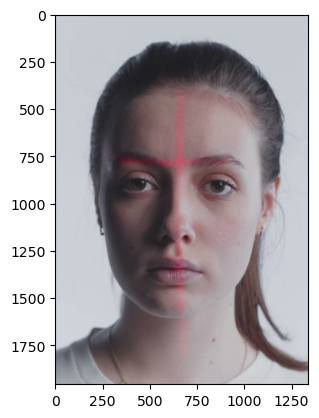

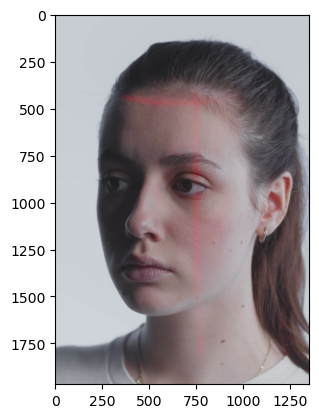

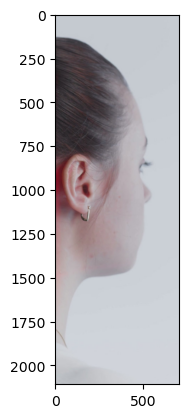

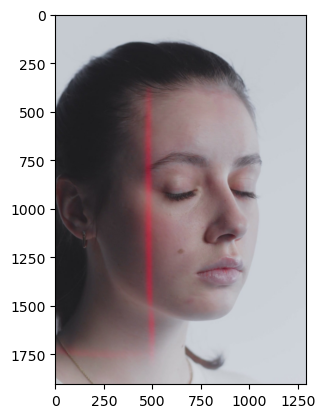

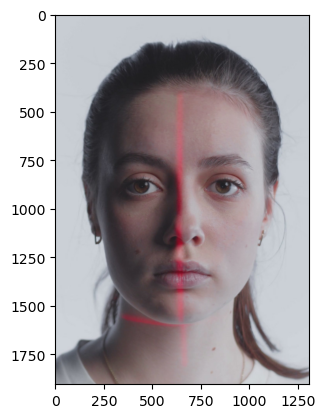

In [24]:
def process_video(video_name):
    uploaded_video_id = video_analysis.upload_to_video_indexer(
        input_filename=video_name + '.mp4',
        video_name=video_name,
        video_language='English'
    )

    video_analysis.check_access_token()
    info = video_analysis.get_video_info(uploaded_video_id)

    # Single progress bar integration
    while not info or 'videos' not in info or not info['videos'] or 'processingProgress' in info['videos'][0] and info['videos'][0]['processingProgress'] != '100%':
        if 'processingProgress' in info['videos'][0]:
            percentage = info['videos'][0]['processingProgress']
        else:
            percentage = "0%"
    
        sys.stdout.write("\rProgress: [{}] {} ".format("#" * int(percentage.replace("%", "")) + "-" * (100 - int(percentage.replace("%", ""))), percentage))
        sys.stdout.flush()
        time.sleep(10)
        info = video_analysis.get_video_info(uploaded_video_id)

    sys.stdout.write("\n")  # Newline after progress bar completion

    if not info:
        print("\nNo info returned from video indexer for video {}".format(video_name))
        return

    video_data = info['videos'][0]

    if 'insights' not in video_data or 'faces' not in video_data['insights'] or not video_data['insights']['faces']:
        print("\nNo face insights found in the video {}".format(video_name))
        return

    face_data = video_data['insights']['faces'][0]
    if 'thumbnails' not in face_data or not face_data['thumbnails']:
        print("\nNo face thumbnails found in the video {}".format(video_name))
        return

    print("\nWe found {} faces in {}.".format(str(len(face_data['thumbnails'])), video_name))

    images = []
    for each_thumb in face_data['thumbnails']:
        if 'fileName' in each_thumb and 'id' in each_thumb:
            thumb_id = each_thumb['id']
            img_code = video_analysis.get_thumbnail_from_video_indexer(uploaded_video_id, thumb_id)
            img_stream = io.BytesIO(img_code)
            img = Image.open(img_stream)
            images.append(img)

    # Capture and save only 5 thumbnails directly to the local directory (not in a subdirectory)
    for i, img in enumerate(images[:5]):
        thumbnail_path = os.path.join(os.getcwd(), video_name + '-face' + str(i + 1) + '.jpg')
        img.save(thumbnail_path)
        imshow(img)
        plt.show()

videos = ['ca-dl-avkash-chauhan', 'ca-dl-james-jackson', 'ca-dl-james-webb', 'ca-dl-libby-herold', 'ca-dl-radha-s-kumar']

for video in videos:
    process_video(video)


In [25]:

AZURE_FORM_RECOGNIZER_ENDPOINT = ""
AZURE_FORM_RECOGNIZER_KEY = ""
endpoint = AZURE_FORM_RECOGNIZER_ENDPOINT
key = AZURE_FORM_RECOGNIZER_KEY
form_recognizer_client = FormRecognizerClient(endpoint=endpoint, credential=AzureKeyCredential(key))
# Create a client for Face API


ID_URLs = [
    'https://mymlworkspace6225174622.blob.core.windows.net/digitalidface/ca-dl-avkash-chauhan.png', 
    'https://mymlworkspace6225174622.blob.core.windows.net/digitalidface/ca-dl-james-jackson.png', 
    'https://mymlworkspace6225174622.blob.core.windows.net/digitalidface/ca-dl-james-webb.png', 
    'https://mymlworkspace6225174622.blob.core.windows.net/digitalidface/ca-dl-libby-herold.png', 
    'https://mymlworkspace6225174622.blob.core.windows.net/digitalidface/ca-dl-radha-s-kumar.png'
]

PERSON_GROUP_ID = str(uuid.uuid4())

def print_id_card_details(identity_card):
    first_name = identity_card.fields.get("FirstName")
    last_name = identity_card.fields.get("LastName")
    if first_name and last_name:
        return f"{first_name.value} {last_name.value}"
    else:
        print("Name not found!")
        return None

def extract_data_from_ids(form_recognizer_client, url):
    try:
        id_content_from_url = form_recognizer_client.begin_recognize_identity_documents_from_url(url)
        collected_id_cards = id_content_from_url.result()
        if collected_id_cards:
            return print_id_card_details(collected_id_cards[0])
        else:
            print(f"No data found for URL: {url}")
            return None
    except Exception as e:
        print(f"Error processing URL {url}: {str(e)}")
        return None

def identify_face(image_url, person_group_id):
    identity_results = {}
    try:
        detected_faces = face_client.face.detect_with_url(image_url)
        if not detected_faces:
            print(f"No faces detected in {image_url}")
            return identity_results

        face_ids = [face.face_id for face in detected_faces]
        results = face_client.face.identify(face_ids, person_group_id)

        for result in results:
            if result.candidates:
                for candidate in result.candidates:
                    name_from_id = extract_data_from_ids(form_recognizer_client, image_url)
                    if name_from_id:
                        is_confident = candidate.confidence > 0.5
                        identity_results[name_from_id] = is_confident
        return identity_results
    except Exception as e:
        print(f"Error encountered during identification: {e}")
        return identity_results
# Create and train person group
def build_person_group(client, person_group_id):
    try:
        print('Create and build a person group...')
        # Create empty Person Group.
        client.person_group.create(person_group_id=person_group_id, name=person_group_id)

        for url in ID_URLs:
            person_name = url.split('/')[-1].replace('.png', '')
            print(f"Processing for {person_name}")
            person = client.person_group_person.create(person_group_id, person_name)

            # Use thumbnails from the local directory that match the person_name
            my_face_images = glob.glob(person_name + '-face*.jpg')
            if not my_face_images:
                print(f"No local images found for {person_name}")

            for image_path in my_face_images:
                print(f"Processing image {image_path}")
                with open(image_path, 'rb') as w:
                    detected_faces = face_client.face.detect_with_stream(w)
                    if not detected_faces:
                        print(f"No faces detected in {image_path}. Skipping this image.")
                        continue

                    # Add image to person group if a face is detected
                    w.seek(0)  # Reset stream position
                    client.person_group_person.add_face_from_stream(person_group_id, person.person_id, w)
                    print(f"Added face from {image_path} to {person_name}")

        # Train the person group
        print("Training the person group...")
        client.person_group.train(person_group_id)

        while True:
            training_status = client.person_group.get_training_status(person_group_id)
            print("Training status: {}.".format(training_status.status))
            if training_status.status is TrainingStatusType.succeeded:
                print("Training succeeded!")
                break
            elif training_status.status is TrainingStatusType.failed:
                sys.exit('Training the person group has failed.')
            time.sleep(5)
    except Exception as e:
        print(f"Error encountered: {e}")


# Build and train person group
build_person_group(face_client, PERSON_GROUP_ID)

# Identify each ID_URL with the trained person group
valid_names_dict = {}
for url in ID_URLs:
    results = identify_face(url, PERSON_GROUP_ID)
    valid_names_dict.update(results)

print(valid_names_dict)


Create and build a person group...
Processing for ca-dl-avkash-chauhan
Processing image ca-dl-avkash-chauhan-face1.jpg
Added face from ca-dl-avkash-chauhan-face1.jpg to ca-dl-avkash-chauhan
Processing image ca-dl-avkash-chauhan-face2.jpg
Added face from ca-dl-avkash-chauhan-face2.jpg to ca-dl-avkash-chauhan
Processing image ca-dl-avkash-chauhan-face3.jpg
Added face from ca-dl-avkash-chauhan-face3.jpg to ca-dl-avkash-chauhan
Processing image ca-dl-avkash-chauhan-face4.jpg
Added face from ca-dl-avkash-chauhan-face4.jpg to ca-dl-avkash-chauhan
Processing image ca-dl-avkash-chauhan-face5.jpg
Added face from ca-dl-avkash-chauhan-face5.jpg to ca-dl-avkash-chauhan
Processing for ca-dl-james-jackson
Processing image ca-dl-james-jackson-face1.jpg
Added face from ca-dl-james-jackson-face1.jpg to ca-dl-james-jackson
Processing image ca-dl-james-jackson-face2.jpg
Added face from ca-dl-james-jackson-face2.jpg to ca-dl-james-jackson
Processing image ca-dl-james-jackson-face3.jpg
Added face from ca-d

## Step 4

In [26]:
PREDICTION_ENDPOINT = ''
prediction_key = ""
prediction_resource_id = ""

In [27]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, prediction_credentials)

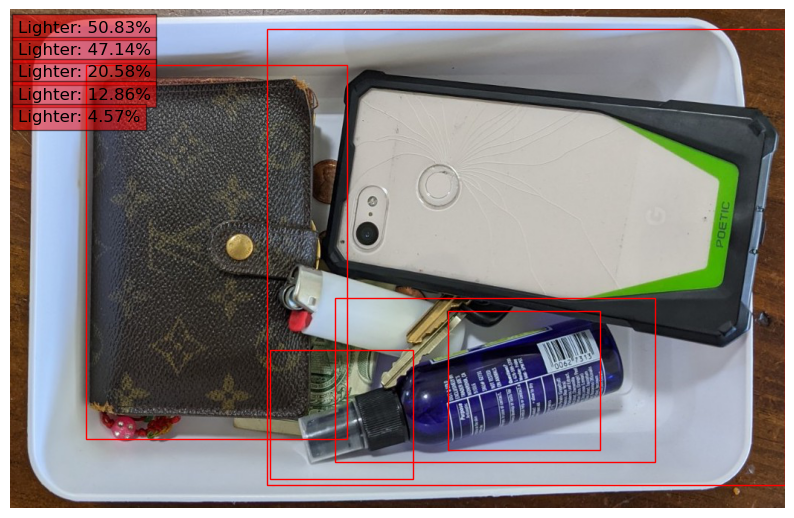

In [28]:


def perform_prediction(image_file_url):
    # Fetch the image content from the URL
    response = requests.get(image_file_url)
    if response.status_code == 200:
        image_contents = response.content
        
        # Load the image for visualization
        image = Image.open(BytesIO(image_contents))
        width, height = image.size
        
        results = predictor.detect_image("3b8974a9-03cd-436e-8686-cf429d7b0c42", "Iteration5", image_contents)
        
        # Sort the results based on probability and select top 5
        sorted_predictions = sorted(results.predictions, key=lambda x: x.probability, reverse=True)[:5]
        
        # Display the results
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(image)
        ax.axis('off')
        
        # Display the top 5 tags on the image and draw bounding boxes
        for idx, prediction in enumerate(sorted_predictions):
            tag = "{}: {:.2f}%".format(prediction.tag_name, prediction.probability * 100)
            plt.text(10, (idx + 1) * 30, tag, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
            
            # Draw rectangle around the detected object
            left = prediction.bounding_box.left * width
            top = prediction.bounding_box.top * height
            rect_width = prediction.bounding_box.width * width
            rect_height = prediction.bounding_box.height * height
            
            rect = patches.Rectangle((left, top), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        
        plt.show()
        
    else:
        print("Failed to fetch the image content from the provided URL")

file_name = "https://mymlworkspace6225174622.blob.core.windows.net/lighters/lighter_test_set_1of5.jpg"
perform_prediction(file_name)


## Step 2

In [29]:
AZURE_FORM_RECOGNIZER_ENDPOINT = ""
AZURE_FORM_RECOGNIZER_KEY = ""

In [30]:
endpoint = AZURE_FORM_RECOGNIZER_ENDPOINT
key = AZURE_FORM_RECOGNIZER_KEY

In [31]:
form_training_client = FormTrainingClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [32]:
saved_model_list = form_training_client.list_custom_models()

## Training Source Data URL

To generate the training data URL, you can 
1. Download the Cognito Corporation training documents to your local system: https://github.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/tree/main/resources/cognito-corp-docs.
2. Upload the training documents to a blob container at Azure Blob Storage. Training documents are named `Cognito-corporation-u*.pdf`. 
3. Generate a SAS URL of the training data container. 
4. Once the model is trained, you will use the `Cognito-corporation-test01.png` file located in this GitHub directory to perform prediction: https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/Cognito-corporation-test01.png

In [33]:
# Blob Storage for Training Directory

trainingDataUrl = ""


# Performing Unlabeled Training


In [34]:
training_process = form_training_client.begin_training(trainingDataUrl, use_training_labels=False)
custom_model = training_process.result()

## Getting Model Info

In [35]:
custom_model

CustomFormModel(model_id=20ee710d-ff42-4688-b5ce-42f457880404, status=ready, training_started_on=2023-10-30 02:51:14+00:00, training_completed_on=2023-10-30 02:51:37+00:00, submodels=[CustomFormSubmodel(accuracy=None, model_id=20ee710d-ff42-4688-b5ce-42f457880404, fields={'field-0': CustomFormModelField(label=Baggage, name=field-0, accuracy=None), 'field-1': CustomFormModelField(label=Boarding Time, name=field-1, accuracy=None), 'field-2': CustomFormModelField(label=Carrier, name=field-2, accuracy=None), 'field-3': CustomFormModelField(label=Chicago, name=field-3, accuracy=None), 'field-4': CustomFormModelField(label=Class, name=field-4, accuracy=None), 'field-5': CustomFormModelField(label=Date, name=field-5, accuracy=None), 'field-6': CustomFormModelField(label=Flight No., name=field-6, accuracy=None), 'field-7': CustomFormModelField(label=From, name=field-7, accuracy=None), 'field-8': CustomFormModelField(label=From:, name=field-8, accuracy=None), 'field-9': CustomFormModelField(lab

In [36]:
custom_model.model_id

'20ee710d-ff42-4688-b5ce-42f457880404'

In [37]:
custom_model.status

'ready'

In [38]:
custom_model.training_started_on

datetime.datetime(2023, 10, 30, 2, 51, 14, tzinfo=<isodate.tzinfo.Utc object at 0x000001767AD160D0>)

In [39]:
custom_model.training_completed_on

datetime.datetime(2023, 10, 30, 2, 51, 37, tzinfo=<isodate.tzinfo.Utc object at 0x000001767AD160D0>)

In [40]:
custom_model.training_documents

[TrainingDocumentInfo(name=boarding-james-webb.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding-libby.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass1.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass10.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass2.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass3.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass4.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass5.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass6.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass

In [41]:
custom_model_info = form_training_client.get_custom_model(model_id=custom_model.model_id)
print("Model ID: {}".format(custom_model_info.model_id))
print("Status: {}".format(custom_model_info.status))
print("Training started on: {}".format(custom_model_info.training_started_on))
print("Training completed on: {}".format(custom_model_info.training_completed_on))

Model ID: 20ee710d-ff42-4688-b5ce-42f457880404
Status: ready
Training started on: 2023-10-30 02:51:14+00:00
Training completed on: 2023-10-30 02:51:37+00:00


## Using an image document as test document URL (Not using PDF here)

* Here, you will use the `Cognito-corporation-test01.png` file located in this GitHub directory to perform prediction: https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/Cognito-corporation-test01.png
* Note: If you want to use a PDF document for the test, please save and upload PDF to Azure Blob Storage and use the SAS URL of this PDF document as the target URL.
* Using a PDF document from the GitHub URL will give you an error.
* You will see a screenshot of how to do this on the exercise solution page later in this lesson. 

In [42]:
new_test_url = ""

In [43]:
form_recognizer_client = FormRecognizerClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [44]:
custom_test_action = form_recognizer_client.begin_recognize_custom_forms_from_url(model_id=custom_model_info.model_id, form_url=new_test_url)

In [45]:
custom_test_action_result = custom_test_action.result()

In [46]:
labeled_training_process = form_training_client.begin_training(trainingDataUrl, use_training_labels=True)
labeled_custom_model = labeled_training_process.result()

In [47]:
labeled_custom_model.training_documents

[TrainingDocumentInfo(name=boarding_pass1.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass10.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass2.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass3.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass4.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass5.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass6.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass7.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass8.pdf, status=succeeded, page_count=1, errors=[], model_id=None),
 TrainingDocumentInfo(name=boarding_pass9.pdf

In [48]:
labeled_custom_test_action = form_recognizer_client.begin_recognize_custom_forms_from_url(model_id=labeled_custom_model.model_id, form_url=new_test_url)
labeled_custom_test_action_result = labeled_custom_test_action.result()
for recognized_content in labeled_custom_test_action_result:
    print("Form type: {}".format(recognized_content.form_type))
    for name, field in recognized_content.fields.items():
        print("Field '{}' has label '{}' with value '{}' and a confidence score of {}".format(
            name,
            field.label_data.text if field.label_data else name,
            field.value,
            field.confidence
        ))

Form type: custom:6cfe75bb-eadd-4d0a-a059-b708310d743b
Field 'Bag' has label 'Bag' with value 'NO' and a confidence score of 0.598
Field 'Time' has label 'Time' with value '10:00 AM PST' and a confidence score of 0.422
Field 'Class' has label 'Class' with value 'E' and a confidence score of 0.689
Field 'Flight' has label 'Flight' with value '234' and a confidence score of 0.99
Field 'To' has label 'To' with value 'Chicago' and a confidence score of 0.99
Field 'Gate' has label 'Gate' with value 'G1' and a confidence score of 0.99
Field 'Carrier' has label 'Carrier' with value 'UA' and a confidence score of 0.99
Field 'From' has label 'From' with value 'San Francisco' and a confidence score of 0.99
Field 'Date' has label 'Date' with value 'April 20, 2022' and a confidence score of 0.653
Field 'Name' has label 'Name' with value 'Avkash Chauhan' and a confidence score of 0.99
Field 'Seat' has label 'Seat' with value '20A' and a confidence score of 0.988


## Listing Models

In [49]:
saved_model_list = form_training_client.list_custom_models()

In [50]:
## Creating another model with labeled training
labeled_2_training_process = form_training_client.begin_training(trainingDataUrl, use_training_labels=True)
labeled_2_custom_model = labeled_2_training_process.result()

In [51]:
cognito_corporation_model_list = [labeled_custom_model.model_id, labeled_2_custom_model.model_id]

In [52]:
composed_process = form_training_client.begin_create_composed_model(
            cognito_corporation_model_list, model_name="Cognito Corporation Model")
composed_process_model = composed_process.result()

In [53]:
composed_model_info = form_training_client.get_custom_model(model_id=composed_process_model.model_id)
print("Model ID: {}".format(composed_model_info.model_id))
print("Status: {}".format(composed_model_info.status))
print("Training started on: {}".format(composed_model_info.training_started_on))
print("Training completed on: {}".format(composed_model_info.training_completed_on))

Model ID: 83d4a61f-27c0-4565-bb1b-458be09d2846
Status: ready
Training started on: 2023-10-30 02:52:09+00:00
Training completed on: 2023-10-30 02:52:09+00:00


## Using the composed model to extract data from the boarding_pass

In [54]:
# Global list to store flight-specific information from each boarding pass
flight_info_list = []

# Global array to store the names
names_array = []

def process_training_data_urls(form_recognizer_client, composed_process_model, training_data_urls):
    """
    Process and print recognized forms from a list of training data URLs.
    
    :param form_recognizer_client: The Form Recognizer client.
    :param composed_process_model: The composed model object.
    :param training_data_urls: List of training data URLs to be processed.
    """
    global flight_info_list  # Indicate that we're using the global list
    global names_array  # Indicate that we're using the global array

    # Assuming each URL in the list is a separate training dataset
    for training_data_url in training_data_urls:
        composed_model_testing = form_recognizer_client.begin_recognize_custom_forms_from_url(model_id=composed_process_model.model_id, form_url=training_data_url)
        composed_model_testing_result = composed_model_testing.result()
        for recognized_content in composed_model_testing_result:
            # Create an empty dictionary for each boarding pass
            flight_info_dict = {}
            print("Form type: {}".format(recognized_content.form_type))
            
            for name, field in recognized_content.fields.items():
                # If the field is "Name", append its value to the global array
                if name == "Name":
                    names_array.append(field.value)

                # Populate the dictionary with the desired fields
                if name in ['Flight', 'Name', 'From', 'Carrier', 'Seat', 'Time', 'Date', 'Class', 'To']:
                    flight_info_dict[name] = field.value

                print("Field '{}' has label '{}' with value '{}' and a confidence score of {}".format(
                name,
                field.label_data.text if field.label_data else name,
                field.value,
                field.confidence
                ))
            
            # Append the dictionary to the global list
            flight_info_list.append(flight_info_dict)
            print("-----------------------------------------------------------------")

# Boarding Passes
training_data_urls = [
    "https://mymlworkspace6225174622.blob.core.windows.net/boardingpass/pass1.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/boardingpass/pass2.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/boardingpass/pass3.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/boardingpass/pass4.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/boardingpass/pass5.png",
]
process_training_data_urls(form_recognizer_client, composed_process_model, training_data_urls)

# To view the collected flight information
for flight_info in flight_info_list:
    print(flight_info)
print("-----------------------------------------------------------------")

# To view the collected names
print(names_array)


Form type: Cognito Corporation Model:b1f7be88-9c5c-4353-962f-f821a1853ebd
Field 'Bag' has label 'Bag' with value 'NO' and a confidence score of 0.598
Field 'Time' has label 'Time' with value '10:00 AM PST' and a confidence score of 0.422
Field 'Class' has label 'Class' with value 'E' and a confidence score of 0.689
Field 'Flight' has label 'Flight' with value '234' and a confidence score of 0.99
Field 'To' has label 'To' with value 'Chicago' and a confidence score of 0.99
Field 'Gate' has label 'Gate' with value 'G1' and a confidence score of 0.99
Field 'Carrier' has label 'Carrier' with value 'UA' and a confidence score of 0.99
Field 'From' has label 'From' with value 'San Francisco' and a confidence score of 0.99
Field 'Date' has label 'Date' with value 'April 20, 2022' and a confidence score of 0.653
Field 'Name' has label 'Name' with value 'Avkash Chauhan' and a confidence score of 0.99
Field 'Seat' has label 'Seat' with value '20A' and a confidence score of 0.988
-----------------

## Validate ID Cards

In [55]:
content_url_list =[
    "https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-avkash-chauhan.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-james-jackson.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-james-webb.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-libby-herold.png",
    "https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-radha-s-kumar.png"
]

## Get DOB from IDs

In [56]:
# Global dictionary to capture DateOfBirth using full name as the key
dob_dict = {}

def print_id_card_details(identity_card):
    first_name = identity_card.fields.get("FirstName")
    last_name = identity_card.fields.get("LastName")
    full_name = None
    if first_name and last_name:
        full_name = f"{first_name.value} {last_name.value}"
        print(f"Full Name: {full_name}")
    else:
        print("Name not found!")
        return  # Exit the function if full name is not found
    
    dob = identity_card.fields.get("DateOfBirth")
    if dob:
        print("Date of Birth: {} has confidence: {}".format(dob.value, dob.confidence))
        # Add DateOfBirth to the global dictionary using full name as the key
        dob_dict[full_name] = dob.value


def extract_data_from_ids(form_recognizer_client, url_list):
    for url in url_list:
        print(f"Processing URL: {url}")
        try:
            id_content_from_url = form_recognizer_client.begin_recognize_identity_documents_from_url(url)
            collected_id_cards = id_content_from_url.result()
            if collected_id_cards:
                print_id_card_details(collected_id_cards[0])
            else:
                print(f"No data found for URL: {url}")
        except Exception as e:
            print(f"Error processing URL {url}: {str(e)}")
    # Print the captured DateOfBirth using full name as the key after processing all URLs
    print("Captured Dates of Birth:", dob_dict)

# Use the function
extract_data_from_ids(form_recognizer_client, content_url_list)


Processing URL: https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-avkash-chauhan.png
Full Name: AVKASH CHAUHAN CHAUHAN
Date of Birth: 1990-01-01 has confidence: 0.995
Processing URL: https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-james-jackson.png
Full Name: James Jackson
Date of Birth: 1956-10-12 has confidence: 0.995
Processing URL: https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-james-webb.png
Full Name: James Webb
Date of Birth: 1970-12-15 has confidence: 0.995
Processing URL: https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-libby-herold.png
Full Name: Libby Herold
Date of Birth: 1996-02-10 has confidence: 0.995
Processing URL: https://mymlworkspace6225174622.blob.core.windows.net/digitalid/ca-dl-radha-s-kumar.png
Full Name: Radha SKumar
Date of Birth: 1994-03-05 has confidence: 0.995
Captured Dates of Birth: {'AVKASH CHAUHAN CHAUHAN': datetime.date(1990, 1, 1), 'James Jackson': datetime.date(1956

## Set the flightmanifestWrite Validation fields to False

In [57]:
def ensure_validation_fields_false():
    # Define Azure Storage details
    account_name = ''
    account_key = ''
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)
    
    # Read data from flightmanifestwrite
    write_container_name = 'flightmanifestwrite'
    write_blob_name = 'FlightManifest.csv'
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_data = blob_client.download_blob()
    blob_content = blob_data.readall()
    
    # Convert to pandas dataframe
    df = pd.read_csv(io.BytesIO(blob_content))
    
    # Debugging: Print current dataframe as it would appear in a CSV
    print("Before DataFrame:")
    print(df.to_string(index=False))
    
    # Iterate through columns that end with "Validation" and set to "False"
    for col in df.columns:
        if col.endswith("Validation"):
            df[col] = "False"
    
    # Debugging: Print intermediate dataframe as it would appear in a CSV
    print("\nIntermediate DataFrame after setting Validation columns to False:")
    print(df.to_string(index=False))
    
    # Removing duplicate columns
    df = df.loc[:,~df.columns.duplicated()]
    
    # Debugging: Print updated dataframe as it would appear in a CSV
    print("\nUpdated DataFrame after removing duplicate columns:")
    print(df.to_string(index=False))

    # Write the modified dataframe back to flight_manifest_write
    output_stream = io.StringIO()
    df.to_csv(output_stream, index=False)
    output_stream.seek(0)  # Move the cursor to the start of the file
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

    print("\nValidation fields have been set to False and data successfully uploaded to flightmanifestwrite")

# Call the function to execute it
ensure_validation_fields_false()


Before DataFrame:
Carrier  Flight No.    Class          From      To           Date Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex      DateofBirth  DoBValidation  PersonValidation  LuggageValidation  NameValidation  BoardingPassValidation
     UA         234  Economy San Francisco Chicago April 20, 2022     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   1 January 1990           True              True               True            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M 15 December 1970           True              True               True            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M  12 October 1956           True             False               True            True                    True
     UA   

## Validate Boarding Pass and Name on ID Card

In [58]:
EXPECTED_COLUMNS = [
    "Carrier", "Flight No.", "Class", "From", "To", "Date", "Baggage", 
    "Seat", "Gate", "Boarding Time", "Ticket No", "First Name", "Last Name", 
    "Sex", "DateofBirth", "DoBValidation", "PersonValidation", "LuggageValidation", 
    "NameValidation", "BoardingPassValidation"
]

def normalize_name(first_name, last_name):
    return " ".join((first_name + " " + last_name).split()).lower()

def update_name_validation(df, names_array):
    valid_names_set = set(name.lower() for name in names_array)
    updated_rows_name = 0

    for index, row in df.iterrows():
        full_name = normalize_name(row['First Name'], row['Last Name'])
        if full_name in valid_names_set:
            df.at[index, 'NameValidation'] = True
            updated_rows_name += 1
        else:
            print(f"Failed NameValidation for: {full_name} (Row: {index + 1})")

    return df, updated_rows_name

def update_boarding_pass_validation(df, flight_info_list):
    person_info_dict = {info['Name'].lower(): info for info in flight_info_list}
    updated_rows_person = 0
    
    for index, row in df.iterrows():
        full_name = normalize_name(row['First Name'], row['Last Name'])
        if full_name in person_info_dict:
            if str(row['Flight No.']) == str(person_info_dict[full_name]['Flight']):
                df.at[index, 'BoardingPassValidation'] = True
                updated_rows_person += 1
            else:
                print(f"Failed BoardingPassValidation (flight mismatch) for: {full_name} (Row: {index + 1})")
        else:
            print(f"Failed BoardingPassValidation (name not found) for: {full_name} (Row: {index + 1})")

    return df, updated_rows_person

def update_flight_manifest(names_array, flight_info_list):
    try:
        account_name = ''
        account_key = ''
        blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

        read_container_name = 'flightmanifestwrite'
        read_blob_name = 'FlightManifest.csv'
        blob_client = blob_service_client.get_blob_client(container=read_container_name, blob=read_blob_name)
        blob_data = blob_client.download_blob()
        blob_content = blob_data.readall()
        df = pd.read_csv(io.BytesIO(blob_content))

        # Normalize column names to remove leading and trailing spaces
        df.columns = [col.strip() for col in df.columns]
        
        # Debugging Step: Print the dataframe columns
        print(f"Normalized columns in the data: {df.columns.tolist()}")

        unexpected_columns = set(df.columns) - set(EXPECTED_COLUMNS)
        missing_columns = set(EXPECTED_COLUMNS) - set(df.columns)

        if unexpected_columns:
            print(f"Unexpected columns: {list(unexpected_columns)}")
        if missing_columns:
            print(f"Missing columns: {list(missing_columns)}")
        if unexpected_columns or missing_columns:
            raise ValueError("Column mismatch detected in the data!")

        df, updated_names = update_name_validation(df, names_array)
        df, updated_boarding_passes = update_boarding_pass_validation(df, flight_info_list)

        print(f"Total Rows Updated for NameValidation: {updated_names}")
        print(f"Total Rows Updated for BoardingPassValidation: {updated_boarding_passes}")

        output_stream = io.StringIO()
        df.to_csv(output_stream, index=False)
        output_stream.seek(0)
        blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

        # Print updated dataframe
        print("Updated FlightManifest.csv:")
        print(df.head())
        print("Data successfully uploaded to flightmanifestwrite")

    except Exception as e:
        print(f"An error occurred: {e}")
# Sample call
update_flight_manifest(names_array, flight_info_list)


Normalized columns in the data: ['Carrier', 'Flight No.', 'Class', 'From', 'To', 'Date', 'Baggage', 'Seat', 'Gate', 'Boarding Time', 'Ticket No', 'First Name', 'Last Name', 'Sex', 'DateofBirth', 'DoBValidation', 'PersonValidation', 'LuggageValidation', 'NameValidation', 'BoardingPassValidation']
Total Rows Updated for NameValidation: 5
Total Rows Updated for BoardingPassValidation: 5
Updated FlightManifest.csv:
  Carrier  Flight No.     Class           From       To            Date  \
0      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
1      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
2      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
3      UA         234  Business  San Francisco  Chicago  April 20, 2022   
4      UA         234   Economy  San Francisco  Chicago  April 20, 2022   

  Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex  \
0     YES  20A   G1  10:00 AM PST   34236746     Avkash   Cha

## Input PersonValidation, normalize data

In [59]:
def normalize_name(name):
    # Convert to uppercase
    name = name.upper()
    
    # Special case for "SKUMAR"
    if "SKUMAR" in name:
        name = name.replace("SKUMAR", "S KUMAR")
    
    # Remove repeated names in succession
    words = name.split()
    new_words = []
    for i, word in enumerate(words):
        # If current word is same as previous, skip
        if i > 0 and word == words[i-1]:
            continue
        new_words.append(word)
    
    # Check last word for the two uppercase condition and not fully uppercase
    last_word = new_words[-1]
    if len(last_word) > 1 and last_word[0].isupper() and last_word[1].isupper() and not last_word.isupper():
        new_words[-1] = last_word[0]  # Set the last word to initial
        new_words.append(last_word[1:])  # Append the rest as new word
    
    return ' '.join(new_words)

def normalize_dict_names(names_dict):
    normalized_names_dict = {}
    for name, value in names_dict.items():
        normalized_name = normalize_name(name)
        normalized_names_dict[normalized_name] = value
    return normalized_names_dict

# valid_names_dict = {
#    'AVKASH CHAUHAN CHAUHAN': True, 'James Jackson': True, 
#    'James Webb': True, 'Libby Herold': True, 'Radha SKumar': True//
# }

normalized_names_dict = normalize_dict_names(valid_names_dict)
print(normalized_names_dict)


{'AVKASH CHAUHAN': True, 'JAMES JACKSON': True, 'JAMES WEBB': True, 'LIBBY HEROLD': True, 'RADHA S KUMAR': True}


In [60]:


EXPECTED_COLUMNS = [
    "Carrier", "Flight No.", "Class", "From", "To", "Date", "Baggage", 
    "Seat", "Gate", "Boarding Time", "Ticket No", "First Name", "Last Name", 
    "Sex", "DateofBirth", "DoBValidation", "PersonValidation", "LuggageValidation", 
    "NameValidation", "BoardingPassValidation"
]

def normalize_name(first_name, last_name):
    # Combine, split, and join to normalize name
    name = " ".join((first_name + " " + last_name).upper().split())
    return name

def update_person_validation(df, valid_names_dict):
    updated_rows = 0
    # Create a dictionary of normalized names from the valid_names_dict
    normalized_valid_names = {normalize_name(name.split()[0], " ".join(name.split()[1:])): True for name in valid_names_dict.keys()}
    for index, row in df.iterrows():
        full_name_normalized = normalize_name(row['First Name'], row['Last Name'])
        if full_name_normalized in normalized_valid_names:
            if normalized_valid_names[full_name_normalized]:
                df.at[index, 'PersonValidation'] = True
                updated_rows += 1
            else:
                df.at[index, 'PersonValidation'] = False
    return df, updated_rows

def update_flight_manifest(valid_names_dict):
    try:
        account_name = ''
        account_key = ''
        blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

        read_container_name = 'flightmanifestwrite'
        read_blob_name = 'FlightManifest.csv'
        blob_client = blob_service_client.get_blob_client(container=read_container_name, blob=read_blob_name)
        blob_data = blob_client.download_blob()
        blob_content = blob_data.readall()
        df = pd.read_csv(io.BytesIO(blob_content))

        # Normalize column names to remove leading and trailing spaces
        df.columns = [col.strip() for col in df.columns]
        
        unexpected_columns = set(df.columns) - set(EXPECTED_COLUMNS)
        missing_columns = set(EXPECTED_COLUMNS) - set(df.columns)

        if unexpected_columns:
            print(f"Unexpected columns: {list(unexpected_columns)}")
        if missing_columns:
            print(f"Missing columns: {list(missing_columns)}")
        if unexpected_columns or missing_columns:
            raise ValueError("Column mismatch detected in the data!")

        df, updated_persons = update_person_validation(df, valid_names_dict)
        print(f"Total Rows Updated for PersonValidation: {updated_persons}")

        output_stream = io.StringIO()
        df.to_csv(output_stream, index=False)
        output_stream.seek(0)
        blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

        print("Updated FlightManifest.csv:")
        print(df.head())
        print("Data successfully uploaded to flightmanifestwrite")

    except Exception as e:
        print(f"An error occurred: {e}")


# Sample call
update_flight_manifest(normalized_names_dict)

Total Rows Updated for PersonValidation: 5
Updated FlightManifest.csv:
  Carrier  Flight No.     Class           From       To            Date  \
0      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
1      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
2      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
3      UA         234  Business  San Francisco  Chicago  April 20, 2022   
4      UA         234   Economy  San Francisco  Chicago  April 20, 2022   

  Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex  \
0     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   
1     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M   
2      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M   
3      No   3D   G1  10:00 AM PST   34236749      Libby    Herold   F   
4     YES  34B   G1  10:00 AM PST   34236750    Radha S     Kumar   F   

        DateofBirth  DoBValidation  Per

## Validate DOB

In [61]:
import datetime

def normalize_name(name):
    # Convert to uppercase
    name = name.upper()
    
    # Special case for "SKUMAR"
    if "SKUMAR" in name:
        name = name.replace("SKUMAR", "S KUMAR")
    
    # Remove repeated names in succession
    words = name.split()
    new_words = []
    for i, word in enumerate(words):
        # If current word is same as previous, skip
        if i > 0 and word == words[i-1]:
            continue
        new_words.append(word)
    
    # Check last word for the two uppercase condition and not fully uppercase
    last_word = new_words[-1]
    if len(last_word) > 1 and last_word[0].isupper() and last_word[1].isupper() and not last_word.isupper():
        new_words[-1] = last_word[0]  # Set the last word to initial
        new_words.append(last_word[1:])  # Append the rest as new word
    
    return ' '.join(new_words).lower()  # Convert the normalized name to lowercase

def normalize_dict_names(names_dict):
    normalized_names_dict = {}
    for name, value in names_dict.items():
        normalized_name = normalize_name(name)
        normalized_names_dict[normalized_name] = value
    return normalized_names_dict

#dob_dict ={
#    'AVKASH CHAUHAN CHAUHAN': datetime.date(1990, 1, 1), 
#    'James Jackson': datetime.date(1956, 10, 12), 
#    'James Webb': datetime.date(1970, 12, 15), 
#    'Libby Herold': datetime.date(1996, 2, 10), 
#    'Radha SKumar': datetime.date(1994, 3, 5)
#}

normalized_dob_dict = normalize_dict_names(dob_dict)
print(normalized_dob_dict)


{'avkash chauhan': datetime.date(1990, 1, 1), 'james jackson': datetime.date(1956, 10, 12), 'james webb': datetime.date(1970, 12, 15), 'libby herold': datetime.date(1996, 2, 10), 'radha s kumar': datetime.date(1994, 3, 5)}


In [62]:
def normalize_name(first_name, last_name):
    return " ".join((first_name + " " + last_name).split()).lower()

def update_dob_validation(df, dob_dict):
    print(df.head())  # Print a sample of the dataframe before the update

    
    updated_rows_dob = 0
    normalized_dob_dict = {normalize_name(" ".join(key.split()[:-1]), key.split()[-1]): value for key, value in dob_dict.items()}

    for index, row in df.iterrows():
        full_name = normalize_name(row['First Name'], row['Last Name'])
        dob_str = row['DateofBirth']

        if full_name in normalized_dob_dict:
            dob_from_csv = datetime.datetime.strptime(dob_str, '%d %B %Y').date()
            if dob_from_csv == normalized_dob_dict[full_name]:
                df.at[index, 'DoBValidation'] = "TRUE"
                updated_rows_dob += 1

    return df, updated_rows_dob

def update_flight_manifest():
    account_name = ''
    account_key = ''
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

    read_container_name = 'flightmanifestwrite'
    read_blob_name = 'FlightManifest.csv'
    blob_client = blob_service_client.get_blob_client(container=read_container_name, blob=read_blob_name)
    blob_data = blob_client.download_blob()
    blob_content = blob_data.readall()

    df = pd.read_csv(io.BytesIO(blob_content))

#    dob_dict = {
#    'avkash chauhan': datetime.date(1990, 1, 1),
#    'james jackson': datetime.date(1956, 10, 12),
#    'james webb': datetime.date(1970, 12, 15),
#    'libby herold': datetime.date(1996, 2, 10),
#    'radha s kumar': datetime.date(1994, 3, 5)
#    }
    
    
    df, updated_dobs = update_dob_validation(df, normalized_dob_dict)  # DoB validation
    print(df.head())  # Print a sample of the dataframe before the update

    print(f"Total Rows Updated for DoBValidation: {updated_dobs}")

    write_container_name = 'flightmanifestwrite'
    write_blob_name = 'FlightManifest.csv'
    output_stream = io.StringIO()
    df.to_csv(output_stream, index=False)
    output_stream.seek(0)
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

    print("Data successfully uploaded to flightmanifestwrite")

update_flight_manifest()


  Carrier  Flight No.     Class           From       To            Date  \
0      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
1      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
2      UA         234   Economy  San Francisco  Chicago  April 20, 2022   
3      UA         234  Business  San Francisco  Chicago  April 20, 2022   
4      UA         234   Economy  San Francisco  Chicago  April 20, 2022   

  Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex  \
0     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   
1     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M   
2      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M   
3      No   3D   G1  10:00 AM PST   34236749      Libby    Herold   F   
4     YES  34B   G1  10:00 AM PST   34236750    Radha S     Kumar   F   

        DateofBirth  DoBValidation  PersonValidation  LuggageValidation  \
0    1 January 1990          False 

## Set James Web to have a Lighter as aTest case


In [63]:
def set_luggage_validation():
    # Define Azure Storage details
    account_name = ''
    account_key = ''
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)
    
    # Read data from flightmanifestwrite
    write_container_name = 'flightmanifestwrite'
    write_blob_name = 'FlightManifest.csv'
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_data = blob_client.download_blob()
    blob_content = blob_data.readall()
    
    # Convert to pandas dataframe
    df = pd.read_csv(io.BytesIO(blob_content))

    # Debugging: Print current dataframe as it would appear in a CSV
    print("Before DataFrame:")
    print(df.to_string(index=False))

    # Set LuggageValidation to TRUE for all rows
    df['LuggageValidation'] = "True"

    # Set LuggageValidation to FALSE for James Webb
    df.loc[(df['First Name'] == 'James') & (df['Last Name'] == 'Webb'), 'LuggageValidation'] = "False"

    # Debugging: Print updated dataframe as it would appear in a CSV
    print("\nUpdated DataFrame after setting LuggageValidation:")
    print(df.to_string(index=False))

    # Write the modified dataframe back to flight_manifest_write
    output_stream = io.StringIO()
    df.to_csv(output_stream, index=False)
    output_stream.seek(0)  # Move the cursor to the start of the file
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

    print("\nLuggageValidation has been updated and data successfully uploaded to flightmanifestwrite")

# Call the function to execute it
set_luggage_validation()


Before DataFrame:
Carrier  Flight No.    Class          From      To           Date Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex      DateofBirth  DoBValidation  PersonValidation  LuggageValidation  NameValidation  BoardingPassValidation
     UA         234  Economy San Francisco Chicago April 20, 2022     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   1 January 1990           True              True              False            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M 15 December 1970           True              True              False            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M  12 October 1956           True              True              False            True                    True
     UA   

## Set Kumar to False to Test negative case on Boarding Validation


In [64]:
def set_boarding_pass_validation():
    # Define Azure Storage details
    account_name = ''
    account_key = ''
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)
    
    # Read data from flightmanifestwrite
    write_container_name = 'flightmanifestwrite'
    write_blob_name = 'FlightManifest.csv'
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_data = blob_client.download_blob()
    blob_content = blob_data.readall()
    
    # Convert to pandas dataframe
    df = pd.read_csv(io.BytesIO(blob_content))

    # Debugging: Print current dataframe as it would appear in a CSV
    print("Before DataFrame:")
    print(df.to_string(index=False))

    # Set BoardingPassValidation to FALSE for Radha S Kumar
    df.loc[(df['First Name'] == 'Radha S') & (df['Last Name'] == 'Kumar'), 'BoardingPassValidation'] = "False"

    # Debugging: Print updated dataframe as it would appear in a CSV
    print("\nUpdated DataFrame after setting BoardingPassValidation:")
    print(df.to_string(index=False))

    # Write the modified dataframe back to flight_manifest_write
    output_stream = io.StringIO()
    df.to_csv(output_stream, index=False)
    output_stream.seek(0)  # Move the cursor to the start of the file
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

    print("\nBoardingPassValidation has been updated and data successfully uploaded to flightmanifestwrite")

# Call the function to execute it
set_boarding_pass_validation()


Before DataFrame:
Carrier  Flight No.    Class          From      To           Date Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex      DateofBirth  DoBValidation  PersonValidation  LuggageValidation  NameValidation  BoardingPassValidation
     UA         234  Economy San Francisco Chicago April 20, 2022     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   1 January 1990           True              True               True            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M 15 December 1970           True              True              False            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M  12 October 1956           True              True               True            True                    True
     UA   

## Set PersonValidation to FALSE for James Jackson, as a TEST case

In [65]:
def set_person_validation():
    # Define Azure Storage details
    account_name = ''
    account_key = ''
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)
    
    # Read data from flightmanifestwrite
    write_container_name = 'flightmanifestwrite'
    write_blob_name = 'FlightManifest.csv'
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_data = blob_client.download_blob()
    blob_content = blob_data.readall()
    
    # Convert to pandas dataframe
    df = pd.read_csv(io.BytesIO(blob_content))

    # Debugging: Print current dataframe as it would appear in a CSV
    print("Before DataFrame:")
    print(df.to_string(index=False))

    # Set PersonValidation to FALSE for James Jackson
    df.loc[(df['First Name'] == 'James') & (df['Last Name'] == 'Jackson'), 'PersonValidation'] = "False"

    # Debugging: Print updated dataframe as it would appear in a CSV
    print("\nUpdated DataFrame after setting PersonValidation:")
    print(df.to_string(index=False))

    # Write the modified dataframe back to flight_manifest_write
    output_stream = io.StringIO()
    df.to_csv(output_stream, index=False)
    output_stream.seek(0)  # Move the cursor to the start of the file
    blob_client = blob_service_client.get_blob_client(container=write_container_name, blob=write_blob_name)
    blob_client.upload_blob(output_stream.getvalue(), overwrite=True)

    print("\nPersonValidation has been updated and data successfully uploaded to flightmanifestwrite")

# Call the function to execute it
set_person_validation()


Before DataFrame:
Carrier  Flight No.    Class          From      To           Date Baggage Seat Gate Boarding Time  Ticket No First Name Last Name Sex      DateofBirth  DoBValidation  PersonValidation  LuggageValidation  NameValidation  BoardingPassValidation
     UA         234  Economy San Francisco Chicago April 20, 2022     YES  20A   G1  10:00 AM PST   34236746     Avkash   Chauhan   M   1 January 1990           True              True               True            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022     YES   1A   G1  10:00 AM PST   34236747      James      Webb   M 15 December 1970           True              True              False            True                    True
     UA         234  Economy San Francisco Chicago April 20, 2022      No  25B   G1  10:00 AM PST   34236748      James   Jackson   M  12 October 1956           True              True               True            True                    True
     UA   

## Print Results

In [66]:
account_name = ''
account_key = ''
container_name = 'flightmanifestwrite'
blob_name = 'FlightManifest.csv'

def get_updated_manifest_from_blob(account_name, account_key, container_name, blob_name):
    from azure.storage.blob import BlobServiceClient
    from io import StringIO

    # Constructing the connection string
    conn_str = f"DefaultEndpointsProtocol=https;AccountName={account_name};AccountKey={account_key};EndpointSuffix=core.windows.net"
    blob_service_client = BlobServiceClient.from_connection_string(conn_str)

    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

    # Download the blob content to a string
    data = blob_client.download_blob().content_as_text()
    df = pd.read_csv(StringIO(data))
    
    # Ensure columns are cleaned of any leading/trailing spaces
    df.columns = df.columns.str.strip()

    # Convert to boolean for easier comparison
    for col in ['DoBValidation', 'NameValidation', 'BoardingPassValidation', 'LuggageValidation', 'PersonValidation']:
        if col in df.columns:
            series = df[col].astype(str).str.strip().str.upper()
            df[col] = series == "TRUE"
        else:
            print(f"Warning: Column {col} not found in DataFrame.")
    return df

df = get_updated_manifest_from_blob(account_name, account_key, container_name, blob_name)

for index, row in df.iterrows():
    print("------------------------------------------------------------")
    if not row['PersonValidation']:
        print(f"Dear Mr. {row['First Name']} {row['Last Name']},")
        print(f"You are welcome to flight # {row['Flight No.']} leaving at {row['Boarding Time']} from {row['From']} to {row['To']}.")
        print(f"Your seat number is {row['Seat']}, and it is confirmed.")
        print(f"We did not find a prohibited item (lighter) in your carry-on baggage.")
        print("Thanks for following the procedure.")
        print("Your identity could not be verified. Please see a customer service representative.")
    else:
        if row['DoBValidation'] and row.get('NameValidation', False) and row.get('BoardingPassValidation', False):
            print(f"Dear Mr. {row['First Name']} {row['Last Name']},")
            print(f"You are welcome to flight # {row['Flight No.']} leaving at {row['Boarding Time']} from {row['From']} to {row['To']}.")
            print(f"Your seat number is {row['Seat']}, and it is confirmed.")
            if not row['LuggageValidation']:
                print(f"We have found a prohibited item in your carry-on baggage, and it is flagged for removal.")
                print("Your identity is verified. However, your baggage verification failed, so please see a customer service representative.")
            else:
                print(f"We did not find a prohibited item (lighter) in your carry-on baggage,")
                print(f"thanks for following the procedure.")
                print("Your identity is verified so please board the plane.")
        elif row['DoBValidation'] and row.get('NameValidation', False) and not row.get('BoardingPassValidation', False):
            print(f"Dear Sir/Madam,")
            print(f"Your boarding pass for flight # {row['Flight No.']} leaving at {row['Boarding Time']} from {row['From']} to {row['To']} has not been validated.")
            print(f"Please visit our customer service desk for further assistance.")
        else:
            print(f"Dear Sir/Madam,")
            print(f"There seems to be an issue with your credentials for flight # {row['Flight No.']} leaving at {row['Boarding Time']} from {row['From']} to {row['To']}.")
            print(f"Please visit our customer service desk for further assistance.")
    print("\n")
print("------------------------------------------------------------")


------------------------------------------------------------
Dear Mr. Avkash Chauhan,
You are welcome to flight # 234 leaving at 10:00 AM PST from San Francisco to Chicago.
Your seat number is 20A, and it is confirmed.
We did not find a prohibited item (lighter) in your carry-on baggage,
thanks for following the procedure.
Your identity is verified so please board the plane.


------------------------------------------------------------
Dear Mr. James Webb,
You are welcome to flight # 234 leaving at 10:00 AM PST from San Francisco to Chicago.
Your seat number is 1A, and it is confirmed.
We have found a prohibited item in your carry-on baggage, and it is flagged for removal.
Your identity is verified. However, your baggage verification failed, so please see a customer service representative.


------------------------------------------------------------
Dear Mr. James Jackson,
You are welcome to flight # 234 leaving at 10:00 AM PST from San Francisco to Chicago.
Your seat number is 25B,

## Resources 
- https://docs.microsoft.com/en-us/samples/azure/azure-sdk-for-python/formrecognizer-samples/